# Handling missing values
Missing values are common occurrences in data. Handling missing data is important as many machine learning algorithms do not support data with missing values.

### Why there are missing values?
During any survey for collecting data, some information are not get collected and due to data corruption.<br>
For instance, most of the time men do not put down their salary information and women do not put down their age information which creates missing values.<br><br>
We need to handle the missing values and the way we handle them is based on the type of data.<br><br>
*Here I will be using titanic dataset from Kaggle*

In [1]:
import pandas as pd

In [32]:
data= pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


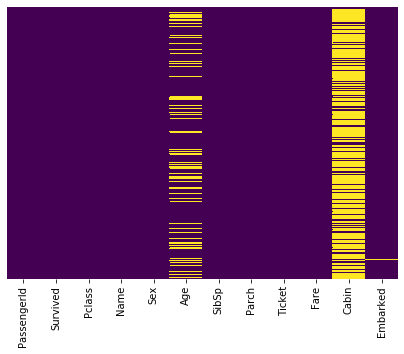

In [33]:
# Age, Cabin and Embarked have null values
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(7,5))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [34]:
# number of null values
data[["Age", "Cabin", "Embarked"]].isnull().sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

Text(0.5, 1.0, 'probability density distribution of Age')

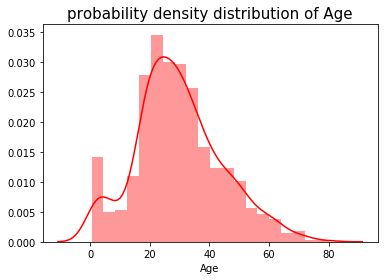

In [5]:
# Age follows normal distribution
sns.distplot(data['Age'].dropna(), color= "red")
plt.title("probability density distribution of Age", fontsize=15)

### 1. Mean / Median / Mode Imputation

In [6]:
# function to impute median in Age
def impute_age(df, variable, median):
    df[variable]= df[variable].fillna(median)

In [7]:
# median of Age
data['Age'].median()

28.0

In [8]:
# impute median to Age
impute_age(data, "Age", 28)

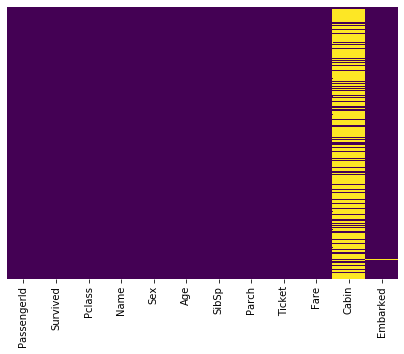

In [9]:
# null values from Age has been removed
plt.figure(figsize=(7,5))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
# comparing Age with null values and Age after imputing with the median
# To compare I am creating a separate column for Age imputed with median
data= pd.read_csv("train.csv")
data["Age_median"]= data["Age"].fillna(data["Age"].median())
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


Text(0.5, 1.0, 'probability density distribution of Age vs Age with median imputed')

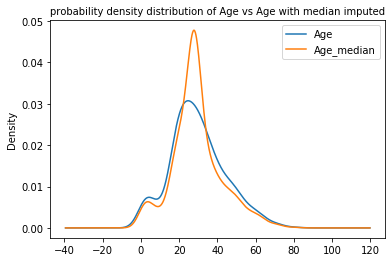

In [11]:
# kernel density estimation to compare the probility density distribution
data[["Age", "Age_median"]].plot.kde()
plt.title("probability density distribution of Age vs Age with median imputed", fontsize=10)

#### ***Imputing with mean and median results in the distortion of probability density distribution***

### 2. Random Sample Imputation
In Random Sample Imputation we take random observations from the dataset itself, and replace the null values with those observations.

In [12]:
data= pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# First we take some random non-null values from Age
data["Age"].dropna().sample()

# NaN value which was in index 327 earlier has now been replaced by 36 

161    40.0
Name: Age, dtype: float64

In [14]:
# Since it generate random value, if we again run this code, it will impute some other random value to a different index
data["Age"].dropna().sample()

730    29.0
Name: Age, dtype: float64

In [15]:
# But Age has 177 null values and the above code will only impute a single random vlaue
data["Age"].isnull().sum()

177

In [16]:
# to impute random values to all the index
data["Age"].dropna().sample(data["Age"].isnull().sum(), random_state=10)

728    25.0
555    62.0
426    28.0
278     7.0
617    26.0
       ... 
696    44.0
486    35.0
44     19.0
62     45.0
571    53.0
Name: Age, Length: 177, dtype: float64

In [17]:
# function to impute random sample
def impute_random(df, variable):
    df[variable] = df[variable]
    random_sample= df[variable].dropna().sample(df[variable].isnull().sum(), random_state=10)
    random_sample.index= df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable]= random_sample

In [18]:
# imputing random samples to Age
impute_random(data, "Age")

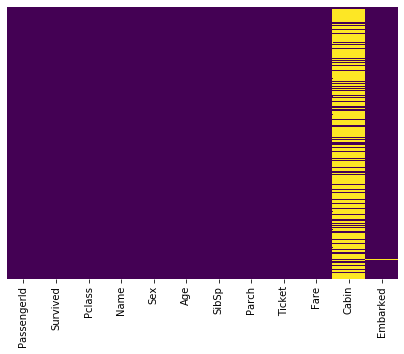

In [19]:
# null values from Age has been removed
plt.figure(figsize=(7,5))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [20]:
# comparing Age with null values and Age after imputing with the median and random samples
# To compare I am creating a separate column for Age imputed with median and random samples
data= pd.read_csv("train.csv")
data["Age_median"]= data["Age"].fillna(data["Age"].median())

data["Age_random"] = data["Age"]
random_sample= data["Age"].dropna().sample(data["Age"].isnull().sum(), random_state=10)
random_sample.index= data[data["Age"].isnull()].index
data.loc[data["Age"].isnull(), "Age_random"]= random_sample
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0


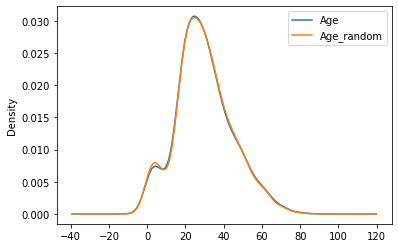

In [21]:
# kernel density estimation to compare the probility density distribution
data[["Age","Age_random"]].plot.kde()

#### ***Imputing null values with random samples almost follows or there is less distortion in the probability density distribution but this method will not work in every scenario***

### 3. End of Distribution imputation
In end of distribution imputation we replace the null values with the value at the end of the distribution i.e with the outlier


In [22]:
data= pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 1.0, 'probability density distribution of Age')

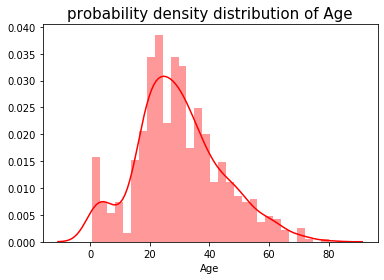

In [23]:
sns.distplot(data['Age'].dropna(), color= "red", bins =30)
plt.title("probability density distribution of Age", fontsize=15)

Since the Age follows the normal distribution, outlier will be the point which lie beyond 3 times the standar deviation from its mean.

In [24]:
# to find the outlier
end_value= data["Age"].mean() + 3*data["Age"].std()
end_value

73.27860964406095

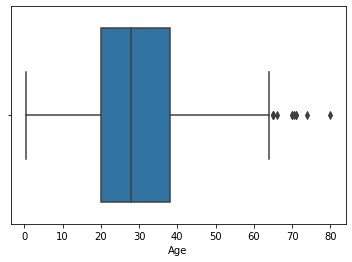

In [25]:
sns.boxplot(data["Age"])

In [26]:
# function to impute this outlier
def impute_end_dist(df, variable):
    df[variable]= df[variable].fillna(df[variable].mean() + 3*df[variable].std())

In [27]:
# imptute to Age column
impute_end_dist(data, "Age")

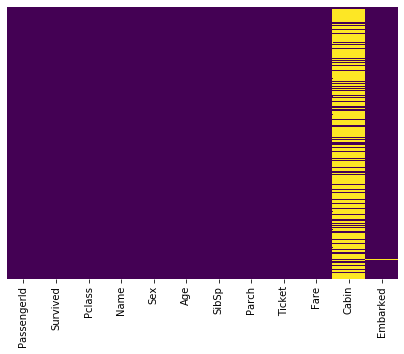

In [28]:
# null values from Age has been removed
plt.figure(figsize=(7,5))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Text(0.5, 1.0, 'probability density distribution of Age_end_dist')

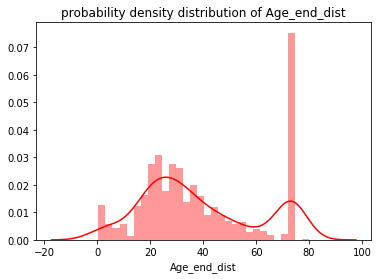

In [29]:
# comparing with the imputed values
data["Age_end_dist"]= data["Age"].fillna(end_value)

sns.distplot(data['Age_end_dist'].dropna(), color= "red", bins =30)
plt.title("probability density distribution of Age_end_dist", fontsize=12)

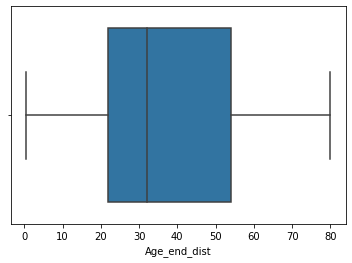

In [30]:
sns.boxplot(data["Age_end_dist"])

#### *Imputing null values with the end distribution value will distort the probability distribution curve but will also remove the outlier.*